In [97]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#Data for ETH, Sol, and Luna Obtained from Flipside Crypto Queries
df_eth= pd.read_csv('download.csv')
df_btc= pd.read_csv('download (1).csv')
df_luna = pd.read_csv('download (2).csv')
df_sol = pd.read_csv('Solana Historical Data - Investing.com.csv')

df_eth['Date'] = pd.to_datetime(df_eth['Date'])
df_btc['Date'] = pd.to_datetime(df_btc['Date'])
df_luna['Date'] = pd.to_datetime(df_luna['Date'])
df_sol['Date'] = pd.to_datetime(df_luna['Date'])
df_luna

,Date,Symbol,AVG Price,High,Low
0,2022-02-28,LUNA,72.797533,73.498588,71.652631
1,2022-02-27,LUNA,75.520534,77.695051,72.106027
2,2022-02-26,LUNA,74.981581,78.477238,73.095805
3,2022-02-25,LUNA,67.196994,72.674011,64.916488
4,2022-02-24,LUNA,56.826220,64.607118,51.604593
...,...,...,...,...,...
944,2019-07-30,LUNA,1.301222,1.326065,1.278406
945,2019-07-29,LUNA,1.265231,1.337838,1.188014
946,2019-07-28,LUNA,1.289826,1.323540,1.254993
947,2019-07-27,LUNA,1.294753,1.357776,1.236710


In [99]:
df_luna['Daily % Change Luna'] = df_luna['AVG Price'].pct_change(periods = -1)
df_eth['Daily % Change ETH'] = df_eth['AVG Price'].pct_change(periods = -1)
df_btc['Daily % Change BTC'] = df_btc['AVG Price'].pct_change(periods = -1)
df_sol['Daily % Change SOL'] = df_sol['Price'].pct_change(periods = -1)
df_sol['AVG Price'] = df_sol['Price']


In [100]:
df_total = df_luna[['Date', 'AVG Price', 'Daily % Change Luna']].merge(df_eth[['Date', 'AVG Price', 'Daily % Change ETH']],on='Date').merge(df_btc[['Date', 'AVG Price', 'Daily % Change BTC']],on='Date').merge(df_sol[['Date', 'AVG Price', 'Daily % Change SOL']],on ='Date')

In [101]:
#change = df_total[['Date','Daily % Change Luna','Daily % Change BTC','Daily % Change ETH','Daily % Change SOL']]
df_total = df_total.set_index('Date')

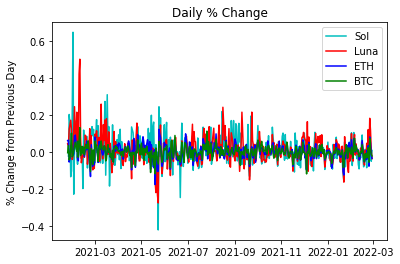

In [102]:
# multiple lines with legend
plt.plot(df_total.index,df_total['Daily % Change SOL'], color = 'c',label = 'Sol')
plt.plot(df_total.index,df_total['Daily % Change Luna'], color='r', label= 'Luna')
plt.plot(df_total.index,df_total['Daily % Change ETH'], color = 'b',label = 'ETH')
plt.plot(df_total.index,df_total['Daily % Change BTC'], color = 'g',label = 'BTC')
plt.title('Daily % Change')
plt.ylabel('% Change from Previous Day')
plt.legend();

Text(0.5, 1.0, 'Correlation Between Daily Changes Between L1s')

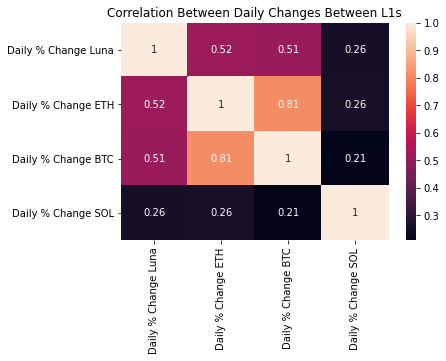

In [103]:
corr_matrix = df_total[['Daily % Change Luna', 'Daily % Change ETH', 'Daily % Change BTC', 'Daily % Change SOL']].corr()
sns.heatmap(corr_matrix,annot = True)
plt.title('Correlation Between Daily Changes Between L1s')

In [104]:

df_total['Volatility Luna'] = df_total['Daily % Change Luna'].rolling(30).std()*(365**0.5)
df_total['Volatility ETH'] = df_total['Daily % Change ETH'].rolling(30).std()*(365**0.5)
df_total['Volatility BTC'] = df_total['Daily % Change BTC'].rolling(30).std()*(365**0.5)
df_total['Volatility SOL'] = df_total['Daily % Change SOL'].rolling(30).std()*(365**0.5)

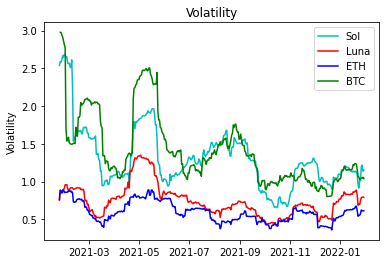

In [105]:
# multiple lines with legend
plt.plot(df_total.index,df_total['Volatility Luna'], color = 'c',label = 'Sol')
plt.plot(df_total.index,df_total['Volatility ETH'], color='r', label= 'Luna')
plt.plot(df_total.index,df_total['Volatility BTC'], color = 'b',label = 'ETH')
plt.plot(df_total.index,df_total['Volatility SOL'], color = 'g',label = 'BTC')
plt.title('Volatility')
plt.ylabel('Volatility')
plt.legend();

In [106]:
df_total['Negative BTC Days'] = df_total['Daily % Change BTC'].apply(lambda x: 1 if x < 0 else 0 )
df_total['Negative Luna Days'] = df_total['Daily % Change Luna'].apply(lambda x: 1 if x < 0 else 0 )
df_total['Negative ETH Days'] = df_total['Daily % Change ETH'].apply(lambda x: 1 if x < 0 else 0 )
df_total['Negative Sol Days'] = df_total['Daily % Change SOL'].apply(lambda x: 1 if x < 0 else 0 )

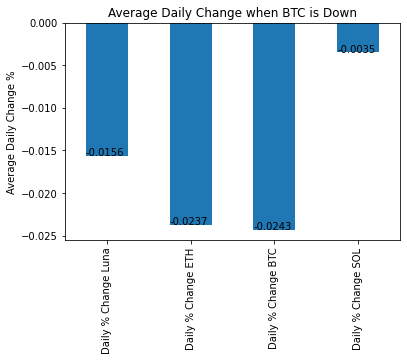

In [107]:
df_btc_neg = df_total[df_total['Daily % Change BTC'] < 0]

ax = pd.DataFrame(df_btc_neg[['Daily % Change Luna', 
            'Daily % Change ETH', 
            'Daily % Change BTC',
            'Daily % Change SOL']].mean().round(4)).plot.bar(legend = False)
plt.title('Average Daily Change when BTC is Down')
plt.ylabel('Average Daily Change %') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
    

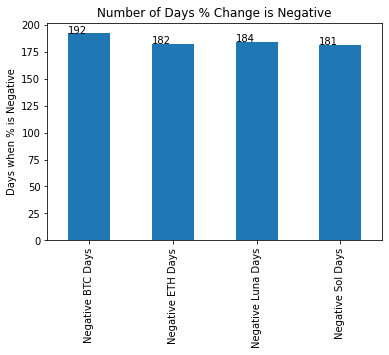

In [108]:
ax = pd.DataFrame(df_total[['Negative BTC Days', 
            'Negative ETH Days', 
            'Negative Luna Days',
            'Negative Sol Days']].sum().round(4)).plot.bar(legend = False)
plt.title('Number of Days % Change is Negative')
plt.ylabel('Days when % is Negative') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
    

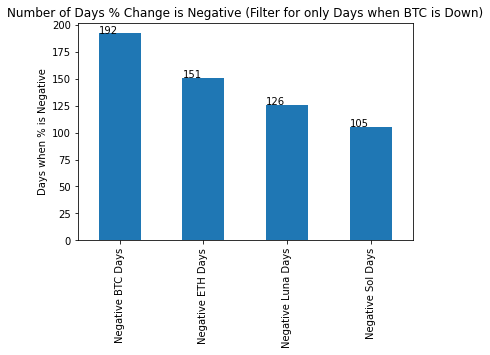

In [109]:
ax = pd.DataFrame(df_btc_neg[['Negative BTC Days', 
            'Negative ETH Days', 
            'Negative Luna Days',
            'Negative Sol Days']].sum().round(4)).plot.bar(legend = False)
plt.title('Number of Days % Change is Negative (Filter for only Days when BTC is Down)')
plt.ylabel('Days when % is Negative') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

In [110]:
Roll_Max = df_total['AVG Price_x'].cummax()
Daily_Drawdown = df_total['AVG Price_x']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()

In [111]:
def monte_carlo(x, number, days):
    drawdowns = np.array([])
    total_gain = np.array([])
    start_price = float(x.tail(1))
    for n in range(number):
        returns = x.pct_change(-1).dropna().to_numpy()
        simulated = np.random.choice(returns,size=days,replace=True)
        simulated_equity = start_price*(1+simulated).cumprod()
        rolling_max = np.maximum.accumulate(simulated_equity)
        max_dd = np.max((rolling_max - simulated_equity)/rolling_max)
        total_return = (simulated_equity[days - 1] - start_price) / start_price
        total_gain = np.append(total_gain, total_return)
        drawdowns = np.append(drawdowns, max_dd)
    return total_gain,drawdowns
     

0.3944346433637834
0.5427962504073689
0.2669307904103556


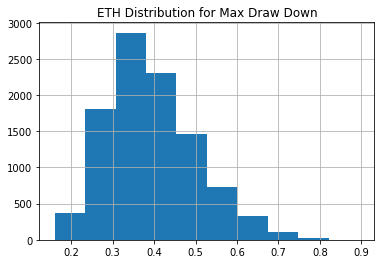

In [112]:
cc, dd = monte_carlo(df_eth['AVG Price'],10000,365)
pd.Series(dd).hist()
plt.title('ETH Distribution for Max Draw Down')
print(np.mean(dd))
print(np.percentile(dd, 90, axis=0))
print(np.percentile(dd, 10, axis=0))

0.5590995404506052
0.7372403599701529
0.39643176621451043


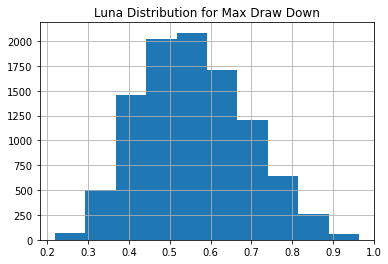

In [113]:
cc, dd = monte_carlo(df_luna['AVG Price'],10000,365)
pd.Series(dd).hist()
plt.title('Luna Distribution for Max Draw Down')
print(np.mean(dd))
print(np.percentile(dd, 90, axis=0))
print(np.percentile(dd, 10, axis=0))


1.6466640987556205
3.7143250220150814
-0.43708029566598866


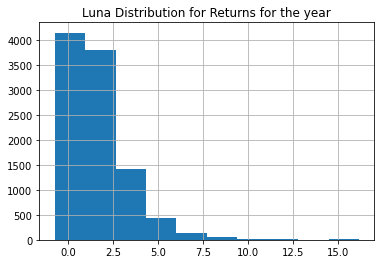

In [124]:
pd.Series(cc).hist()
plt.title('Luna Distribution for Returns for the year')
print(np.mean(cc))
print(np.percentile(cc, 90, axis=0))
print(np.percentile(cc, 1, axis=0))


0.3596274640861066
0.5081971133834312
0.23257437565359057


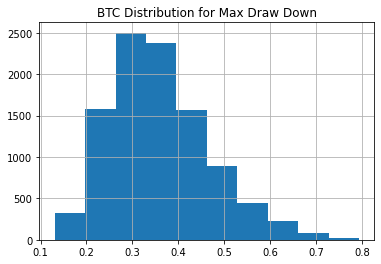

In [119]:
cc, dd = monte_carlo(df_btc['AVG Price'],10000,365)
pd.Series(dd).hist()
plt.title('BTC Distribution for Max Draw Down')
print(np.mean(dd))
print(np.percentile(dd, 90, axis=0))
print(np.percentile(dd, 10, axis=0))

0.6021840386911775
0.7709507375814392
0.44501626037881103


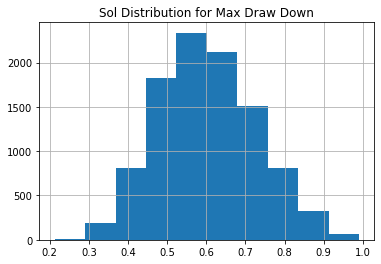

In [118]:
cc, dd = monte_carlo(df_sol['Price'],10000,365)
pd.Series(dd).hist()
plt.title('Sol Distribution for Max Draw Down')
print(np.mean(dd))
print(np.percentile(dd, 90, axis=0))
print(np.percentile(dd, 10, axis=0))